
## DDIM Code 

In [ ]:
import os
import h5py
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch.nn import functional as F
from diffusers import UNet2DModel, DDIMScheduler
from tqdm import tqdm

/home/3782/.conda/envs/diffusion/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# CONFIG 
H5_PATH = "./MICRO2D_homogenized.h5"
CLASS_NAME = "NBSA"
BATCH_SIZE = 8
EPOCHS = 30
LEARNING_RATE = 1e-4
SAMPLE_INTERVAL = 5
RESULTS_DIR = "./Results"
os.makedirs(RESULTS_DIR, exist_ok=True)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# DATASET
class Micro2DDataset(Dataset):
    def __init__(self, h5_path, group='GRF', transform=None):
        self.f = h5py.File(h5_path, 'r')
        self.data = self.f[group][group]
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx][()]
        if self.transform:
            image = self.transform(image)
        return image

# TRANSFORMS
image_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.float()),
    transforms.Lambda(lambda x: x * 2 - 1),
])

In [ ]:
# PLOTTING FUNCTION 
def sample_and_plot(model, scheduler, epoch, device, n_samples=4):
    model.eval()
    noise = torch.randn((n_samples, 1, 256, 256), device=device)

    scheduler.set_timesteps(50)
    with torch.no_grad():
        for t in scheduler.timesteps:
            noise = scheduler.step(model(noise, t).sample, t, noise).prev_sample

    model.train()
    fig, axs = plt.subplots(1, n_samples, figsize=(12, 3))
    for i, img in enumerate(noise):
        img_np = (img.squeeze().cpu().numpy() + 1) / 2
        binary_img = (img_np > 0.5).astype(np.uint8)
        axs[i].imshow(binary_img, cmap="gray")
        axs[i].axis("off")
    plt.suptitle(f"Epoch {epoch} - DDIM Generated Samples")
    plt.tight_layout()
    plt.savefig(f"{RESULTS_DIR}/ddim_samples_epoch{epoch}.png")
    plt.show()

In [ ]:
# LOAD DATA 
dataset = Micro2DDataset(H5_PATH, group=CLASS_NAME, transform=image_transforms)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

In [ ]:
# === MODEL ===
model = UNet2DModel(
    sample_size=256,
    in_channels=1,
    out_channels=1,
    layers_per_block=2,
    block_out_channels=(64, 128, 128),
    down_block_types=("DownBlock2D", "DownBlock2D", "DownBlock2D"),
    up_block_types=("UpBlock2D", "UpBlock2D", "UpBlock2D")
).to(DEVICE)

In [ ]:
scheduler = DDIMScheduler(num_train_timesteps=1000)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)

Epoch 1 | Loss: 0.1196: 100%|██████████████████████████████████████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 2 | Loss: 0.2483: 100%|████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 3 | Loss: 0.0604: 100%|████████████████████████████████████| 205/205 [01:40<00:00,  2.04it/s]
Epoch 4 | Loss: 0.0627: 100%|███████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 5 | Loss: 0.0219: 100%|███████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]


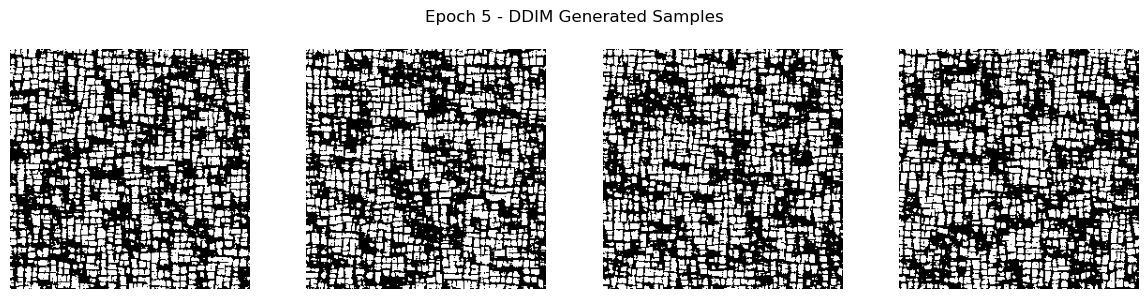

Epoch 6 | Loss: 0.0328: 100%|███████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.02it/s]
Epoch 7 | Loss: 0.0234: 100%|███████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 8 | Loss: 0.0218: 100%|███████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 9 | Loss: 0.0356: 100%|███████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 10 | Loss: 0.0176: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]


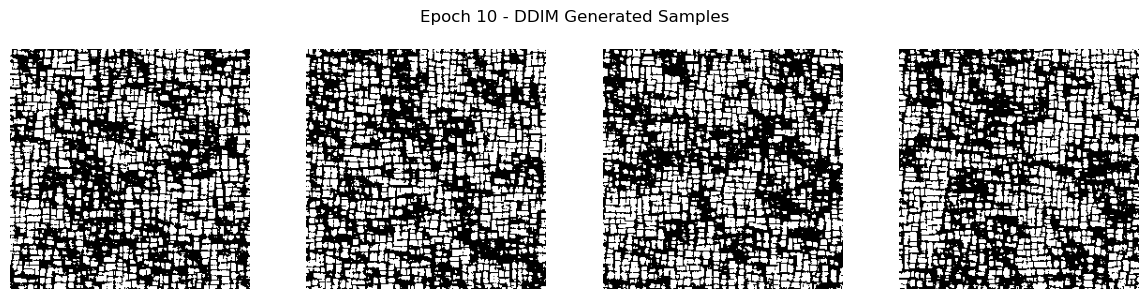

Epoch 11 | Loss: 0.0564: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.02it/s]
Epoch 12 | Loss: 0.0025: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 13 | Loss: 0.0583: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 14 | Loss: 0.0165: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 15 | Loss: 0.0522: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]


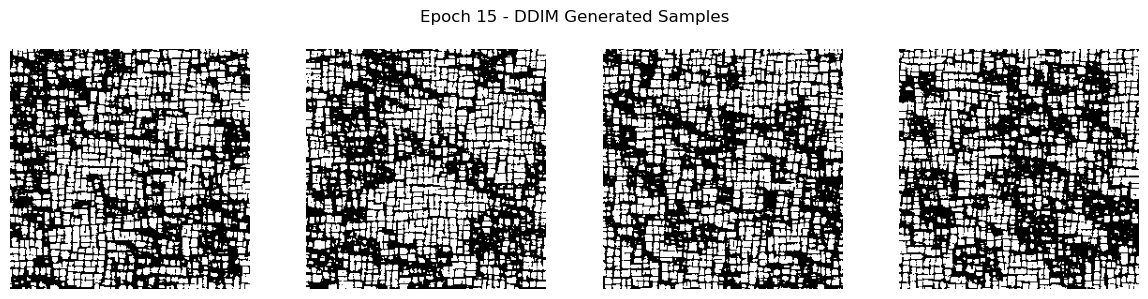

Epoch 16 | Loss: 0.0487: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.02it/s]
Epoch 17 | Loss: 0.0693: 100%|██████████████████████████████████████████████████| 205/205 [01:40<00:00,  2.03it/s]
Epoch 18 | Loss: 0.0501: 100%|██████████████████████████████████████████████████| 205/205 [01:40<00:00,  2.03it/s]
Epoch 19 | Loss: 0.0078: 100%|██████████████████████████████████████████████████| 205/205 [01:40<00:00,  2.03it/s]
Epoch 20 | Loss: 0.0189: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]


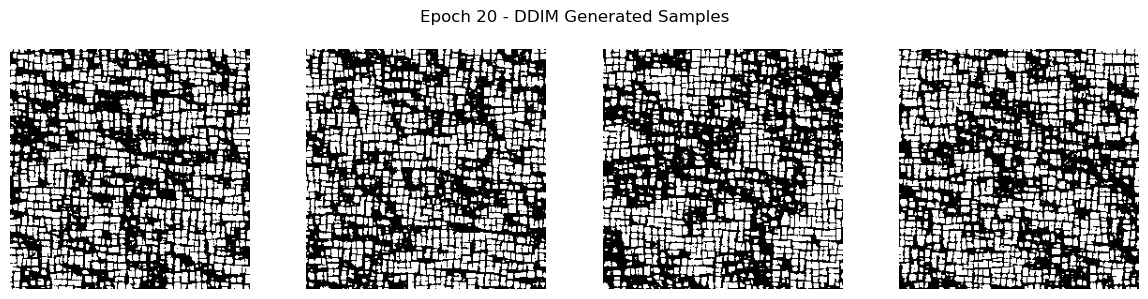

Epoch 21 | Loss: 0.0146: 100%|██████████████████████████████████████████████████| 205/205 [01:40<00:00,  2.03it/s]
Epoch 22 | Loss: 0.0466: 100%|██████████████████████████████████████████████████| 205/205 [01:40<00:00,  2.03it/s]
Epoch 23 | Loss: 0.0076: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 24 | Loss: 0.0045: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.02it/s]
Epoch 25 | Loss: 0.0208: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.02it/s]


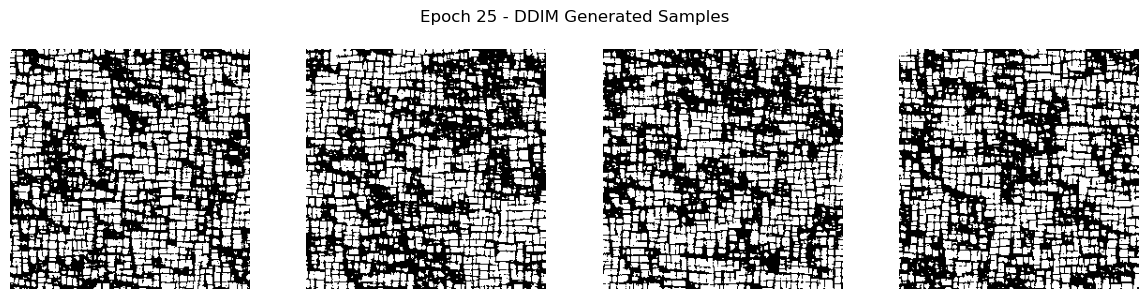

Epoch 26 | Loss: 0.0226: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 27 | Loss: 0.0535: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 28 | Loss: 0.0960: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]
Epoch 29 | Loss: 0.0465: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.02it/s]
Epoch 30 | Loss: 0.0098: 100%|██████████████████████████████████████████████████| 205/205 [01:41<00:00,  2.03it/s]


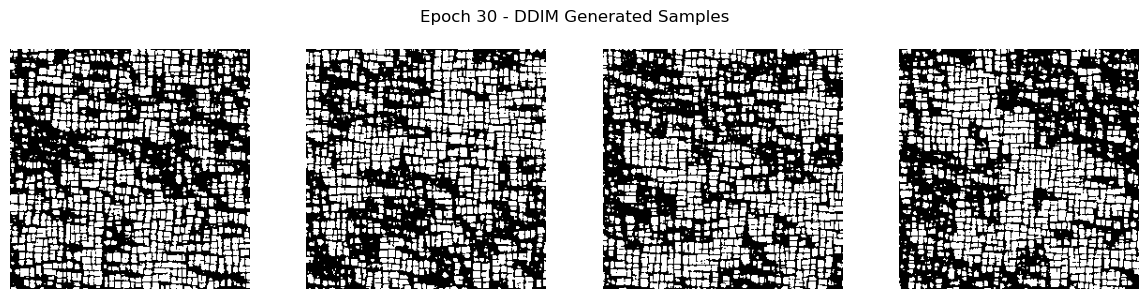

In [ ]:
# TRAIN LOOP 
for epoch in range(EPOCHS):
    pbar = tqdm(dataloader)
    for batch in pbar:
        images = batch.to(DEVICE)
        noise = torch.randn_like(images)
        timesteps = torch.randint(0, scheduler.config.num_train_timesteps, (images.shape[0],), device=DEVICE).long()
        noisy_images = scheduler.add_noise(images, noise, timesteps)

        noise_pred = model(noisy_images, timesteps).sample
        loss = F.mse_loss(noise_pred, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        pbar.set_description(f"Epoch {epoch+1} | Loss: {loss.item():.4f}")

    if (epoch + 1) % SAMPLE_INTERVAL == 0:
        sample_and_plot(model, scheduler, epoch + 1, DEVICE)

# SAVE MODEL 
torch.save(model.state_dict(), f"{RESULTS_DIR}/ddim_micro2d_{CLASS_NAME.lower()}.pt")

## FID, IS, SSIM

In [ ]:
# Load DDIM model, generate samples, calculate FID, IS, SSIM, and volume fraction
import os
import h5py
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models import inception_v3
from torch.nn.functional import adaptive_avg_pool2d
from torchvision.utils import save_image
from torch.utils.data import Dataset, DataLoader
from diffusers import UNet2DModel, DDIMScheduler
from skimage.metrics import structural_similarity as ssim
from skimage.measure import label, regionprops
from scipy.signal import correlate2d
from scipy.stats import wasserstein_distance
from tqdm import tqdm

In [ ]:
# CONFIG 
H5_PATH = "./MICRO2D_homogenized.h5"
CLASS_NAME = "NBSA"
MODEL_PATH = "./Results/ddim_micro2d_nbsa.pt"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 16
NUM_SAMPLES = 256
FID_IMG_SIZE = 299
SAMPLE_SAVE_DIR = "./Results"
os.makedirs(SAMPLE_SAVE_DIR, exist_ok=True)

In [ ]:
# DATASET 
class Micro2DDataset(Dataset):
    def __init__(self, h5_path, group='GRF', transform=None):
        self.f = h5py.File(h5_path, 'r')
        self.data = self.f[group][group]
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx][()]
        if self.transform:
            image = self.transform(image)
        return image

# TRANSFORMS 
transform_real = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.float()),
    transforms.Lambda(lambda x: x * 2 - 1)
])

def transform_fid(img):
    if isinstance(img, torch.Tensor):
        # (C, H, W)
        if img.ndim == 2:  # (H, W)
            img = img.unsqueeze(0)
        elif img.ndim == 3 and img.shape[0] not in [1, 3]:
            img = img.unsqueeze(0)

        # Convert 1-channel to 3-channel if needed
        if img.shape[0] == 1:
            img = img.repeat(3, 1, 1)

        img = transforms.Resize((299, 299))(img)
        return img
    else:
        raise ValueError("Expected image as a PyTorch tensor.")

#  LOAD REAL DATA 
real_dataset = Micro2DDataset(H5_PATH, group=CLASS_NAME, transform=transform_real)
real_loader = DataLoader(real_dataset, batch_size=BATCH_SIZE, shuffle=False)

#  LOAD MODEL 
model = UNet2DModel(
    sample_size=256,
    in_channels=1,
    out_channels=1,
    layers_per_block=2,
    block_out_channels=(64, 128, 128),
    down_block_types=("DownBlock2D", "DownBlock2D", "DownBlock2D"),
    up_block_types=("UpBlock2D", "UpBlock2D", "UpBlock2D")
).to(DEVICE)

model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model.eval()
scheduler = DDIMScheduler(num_train_timesteps=1000)

#  GENERATE SAMPLES 
def generate_samples(model, scheduler, num_images=NUM_SAMPLES):
    model.eval()
    all_images = []
    scheduler.set_timesteps(50)
    for _ in tqdm(range(num_images // BATCH_SIZE)):
        noise = torch.randn((BATCH_SIZE, 1, 256, 256), device=DEVICE)
        with torch.no_grad():
            for t in scheduler.timesteps:
                noise = scheduler.step(model(noise, t).sample, t, noise).prev_sample
        images = (noise + 1) / 2
        all_images.append(images.cpu())
    return torch.cat(all_images, dim=0)[:num_images]

gen_images = generate_samples(model, scheduler)
for i, img in enumerate(gen_images):
    save_image(img, f"{SAMPLE_SAVE_DIR}/gen_{i}.png")

#  PHYSICAL METRICS: SSIM & Volume Fraction 
def physical_metrics(real_loader, generated_images):
    real_imgs = []
    for batch in real_loader:
        real_imgs.append(batch)
        if len(real_imgs) * BATCH_SIZE >= len(generated_images):
            break
    real_imgs = torch.cat(real_imgs, dim=0)[:len(generated_images)].squeeze().numpy()
    gen_imgs = generated_images.squeeze().numpy()

    ssim_scores = []
    vf_real = []
    vf_gen = []

    for real, fake in zip(real_imgs, gen_imgs):
        r_bin = (real > 0).astype(np.uint8)
        f_bin = (fake > 0.5).astype(np.uint8)
        ssim_scores.append(ssim(r_bin, f_bin))
        vf_real.append(r_bin.mean())
        vf_gen.append(f_bin.mean())

    print(f"Avg SSIM: {np.mean(ssim_scores):.4f}")
    print(f"Real Volume Fraction: {np.mean(vf_real):.4f}")
    print(f"Generated Volume Fraction: {np.mean(vf_gen):.4f}")

# INCEPTION STATS FOR FID/IS 
def get_inception_activations(images, model):
    model.eval()
    activations = []
    with torch.no_grad():
        for img in images:
            img_resized = transform_fid(img.squeeze()).unsqueeze(0).to(DEVICE)
            pred = model(img_resized)  # no indexing
            activations.append(pred.squeeze().cpu().numpy())
    return np.array(activations)

def calculate_fid(mu1, sigma1, mu2, sigma2):
    diff = mu1 - mu2
    covmean = sqrtm(sigma1 @ sigma2)
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    fid = diff @ diff + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid

In [ ]:
# CALCULATE FID/IS 
inception = inception_v3(pretrained=True, transform_input=False).to(DEVICE)
inception.fc = torch.nn.Identity()

real_imgs = [transform_fid((img + 1) / 2) for img in real_dataset[:NUM_SAMPLES]]
gen_imgs = [transform_fid(img) for img in gen_images]

act_real = get_inception_activations(real_imgs, inception)
act_gen = get_inception_activations(gen_imgs, inception)

mu_real, sigma_real = act_real.mean(0), np.cov(act_real, rowvar=False)
mu_gen, sigma_gen = act_gen.mean(0), np.cov(act_gen, rowvar=False)

fid = calculate_fid(mu_real, sigma_real, mu_gen, sigma_gen)
print(f"FID Score: {fid:.4f}")

In [ ]:
# Physical metrics 
physical_metrics(real_loader, gen_images)

/tmp/ipykernel_94093/851324218.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
100%|█████████████████

FID Score: 464.5114
Avg SSIM: 0.9752
Real Volume Fraction: 0.3764
Generated Volume Fraction: 0.4369


## Metrics: 2-point correlation, histogram matching, and morphological analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from scipy.signal import correlate2d
from scipy.ndimage import gaussian_filter
from scipy.stats import wasserstein_distance
from skimage.morphology import binary_opening

In [ ]:
# Binarize generated images
gen_imgs_bin = (gen_images.squeeze().numpy() > 0.5).astype(np.uint8)

#  1. 2-Point Correlation Function (Autocorrelation) 
def compute_2pcf(img):
    img = img.astype(np.float32)
    img = img - np.mean(img)
    return correlate2d(img, img, mode='full') / (img.shape[0] * img.shape[1])

def plot_2pcf(real_imgs, gen_imgs, sample_size=10):
    real_2pcf = np.mean([compute_2pcf(img) for img in real_imgs[:sample_size]], axis=0)
    gen_2pcf = np.mean([compute_2pcf(img) for img in gen_imgs[:sample_size]], axis=0)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(real_2pcf, cmap='hot')
    plt.title("Real 2-Point Correlation")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(gen_2pcf, cmap='hot')
    plt.title("Generated 2-Point Correlation")
    plt.axis("off")
    plt.show()

# Prepare real binary images
real_imgs_bin = []
for batch in real_loader:
    real_imgs_bin.append((batch.squeeze().numpy() > 0).astype(np.uint8))
    if len(real_imgs_bin) * BATCH_SIZE >= len(gen_imgs_bin):
        break
real_imgs_bin = np.concatenate(real_imgs_bin, axis=0)[:len(gen_imgs_bin)]

plot_2pcf(real_imgs_bin, gen_imgs_bin)

In [ ]:
#  2. Histogram Matching (Pixel intensity & phase fraction) 
def histogram_analysis(real_imgs, gen_imgs):
    real_hist = np.mean([np.histogram(img, bins=10, range=(0, 1))[0] for img in real_imgs], axis=0)
    gen_hist = np.mean([np.histogram(img, bins=10, range=(0, 1))[0] for img in gen_imgs], axis=0)

    plt.plot(real_hist, label="Real")
    plt.plot(gen_hist, label="Generated")
    plt.title("Pixel Intensity Histogram")
    plt.xlabel("Bin")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

    wd = wasserstein_distance(real_hist, gen_hist)
    print(f"Wasserstein Distance between histograms: {wd:.4f}")

histogram_analysis(real_imgs_bin, gen_imgs_bin)

In [ ]:
#  3. Morphological Analysis 
def morphological_metrics(images, label_name="Generated"):
    porosity = []
    grain_sizes = []
    aspect_ratios = []
    euler_numbers = []

    for img in images:
        props = regionprops(label(img))
        grain_sizes.extend([p.area for p in props])
        aspect_ratios.extend([p.major_axis_length / p.minor_axis_length if p.minor_axis_length > 0 else 0 for p in props])
        porosity.append(1.0 - img.mean())
        euler_numbers.append(len(props))  # number of grains

    print(f"\n[{label_name} Morphology]")
    print(f"Avg Porosity: {np.mean(porosity):.4f}")
    print(f"Avg Grain Size: {np.mean(grain_sizes):.2f}")
    print(f"Avg Aspect Ratio: {np.mean(aspect_ratios):.2f}")
    print(f"Euler Number (connected regions): {np.mean(euler_numbers):.2f}")

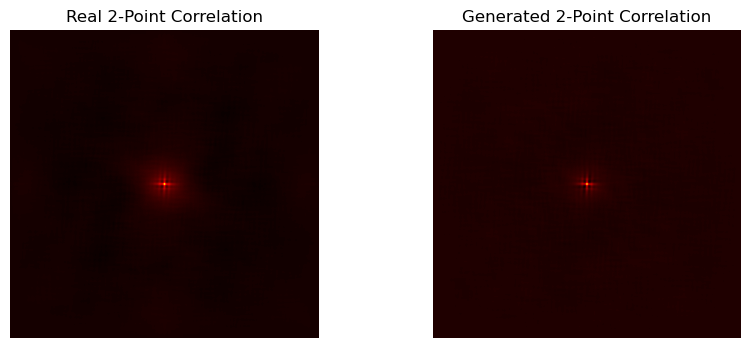

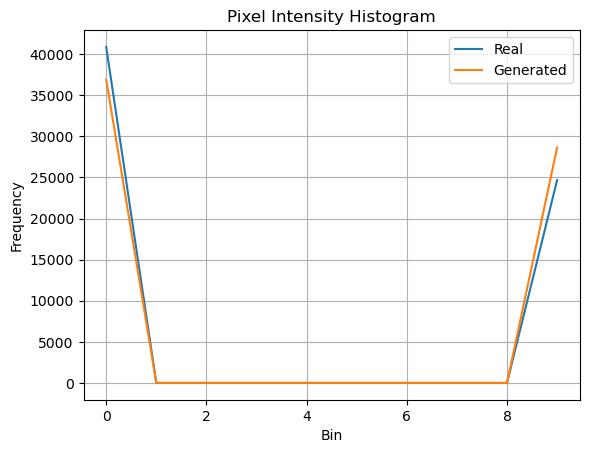

Wasserstein Distance between histograms: 794.0773

[Real Morphology]
Avg Porosity: 0.6236
Avg Grain Size: 32.58
Avg Aspect Ratio: 1.55
Euler Number (connected regions): 756.97

[Generated Morphology]
Avg Porosity: 0.5631
Avg Grain Size: 35.84
Avg Aspect Ratio: 1.51
Euler Number (connected regions): 799.10


In [ ]:
morphological_metrics(real_imgs_bin, "Real")
morphological_metrics(gen_imgs_bin, "Generated")

## Eval Graphs 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from scipy.signal import correlate2d
from scipy.ndimage import binary_fill_holes
from scipy.stats import entropy
from scipy.stats import gaussian_kde

In [ ]:
# 1. Radial Average of 2PCF 
def radial_average_2pcf(img):
    img = img.astype(np.float32)
    img -= np.mean(img)
    corr = correlate2d(img, img, mode="full") / img.size

    y, x = np.indices(corr.shape)
    center = np.array(corr.shape) // 2
    r = np.sqrt((x - center[1])**2 + (y - center[0])**2).astype(int)

    max_r = np.min(center)
    radial_profile = np.array([corr[r == i].mean() for i in range(max_r)])
    return radial_profile

def plot_radial_2pcf(real_imgs, gen_imgs, sample_size=10):
    real_avg = np.mean([radial_average_2pcf(img) for img in real_imgs[:sample_size]], axis=0)
    gen_avg = np.mean([radial_average_2pcf(img) for img in gen_imgs[:sample_size]], axis=0)

    plt.plot(real_avg, label="Real")
    plt.plot(gen_avg, label="Generated")
    plt.title("Radial 2-Point Correlation")
    plt.xlabel("Radius")
    plt.ylabel("Correlation")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# 2. Grain Size Distribution + KL Divergence 
def grain_size_distribution(images, label_name="Generated"):
    sizes = []
    for img in images:
        labeled = label(img)
        props = regionprops(labeled)
        sizes.extend([p.area for p in props])
    return np.array(sizes)

def plot_grain_size_histogram(real_imgs, gen_imgs, bins=30):
    real_sizes = grain_size_distribution(real_imgs)
    gen_sizes = grain_size_distribution(gen_imgs)

    real_hist, bins = np.histogram(real_sizes, bins=bins, density=True)
    gen_hist, _ = np.histogram(gen_sizes, bins=bins, density=True)

    bins_center = 0.5 * (bins[1:] + bins[:-1])

    plt.plot(bins_center, real_hist, label="Real")
    plt.plot(bins_center, gen_hist, label="Generated")
    plt.title("Grain Size Distribution")
    plt.xlabel("Grain Area (pixels)")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)
    plt.show()

    kl = entropy(gen_hist + 1e-8, real_hist + 1e-8)
    print(f"KL Divergence (Grain Size): {kl:.4f}")

In [ ]:
# 3. Orientation Distribution 
def plot_orientation_distribution(images, label_name="Generated"):
    orientations = []
    for img in images:
        for p in regionprops(label(img)):
            if p.major_axis_length > 0 and p.minor_axis_length > 0:
                orientations.append(p.orientation)

    plt.hist(orientations, bins=30, density=True)
    plt.title(f"{label_name} Grain Orientation")
    plt.xlabel("Orientation (radians)")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

In [ ]:
# 4. Fractal Dimension via Box-Counting 
def fractal_dimension(img):
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)
        return len(np.where(S > 0)[0])

    Z = img > 0
    sizes = 2 ** np.arange(1, int(np.log2(min(Z.shape))) - 2)
    counts = [boxcount(Z, size) for size in sizes]
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

def compute_avg_fractal_dimension(images):
    dims = [fractal_dimension(img) for img in images]
    return np.mean(dims)

In [ ]:
# 5. Shape Index 
def shape_index_distribution(images, label_name="Generated"):
    indices = []
    for img in images:
        props = regionprops(label(img))
        for p in props:
            if p.perimeter > 0:
                shape_idx = 4 * np.pi * p.area / (p.perimeter ** 2)
                indices.append(shape_idx)

    plt.hist(indices, bins=30, density=True)
    plt.title(f"{label_name} Shape Index Distribution")
    plt.xlabel("Shape Index (1=circle)")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()
    print(f"Mean Shape Index ({label_name}): {np.mean(indices):.4f}")

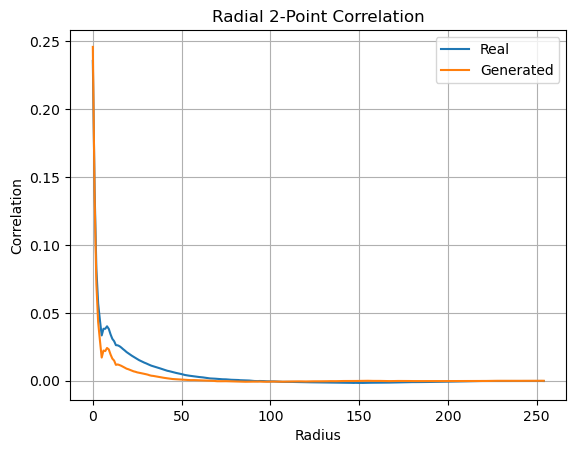

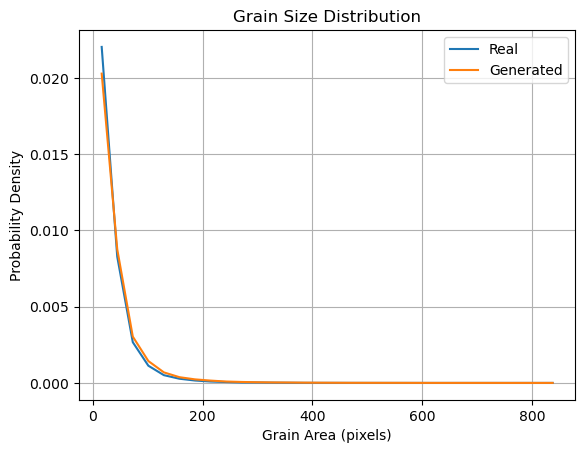

KL Divergence (Grain Size): 0.0090


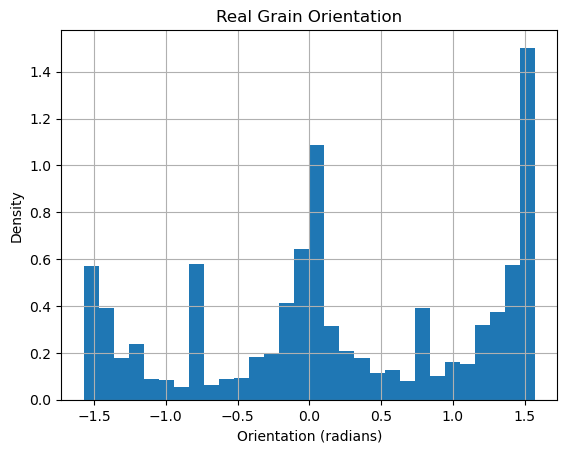

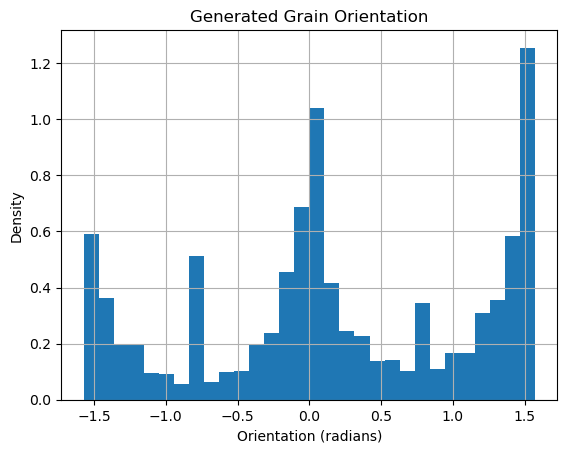

Avg Fractal Dimension (Real): 1.7740
Avg Fractal Dimension (Generated): 1.8355


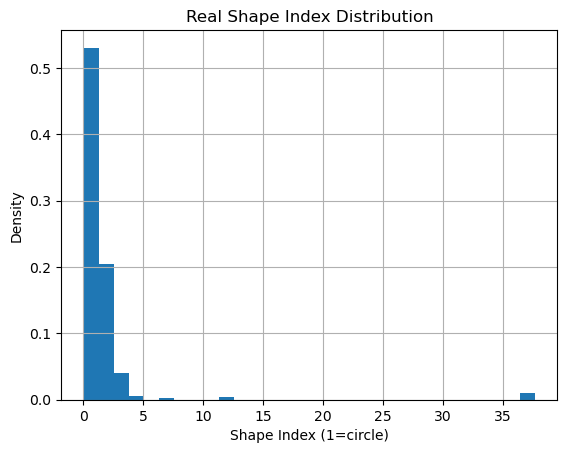

Mean Shape Index (Real): 1.8275


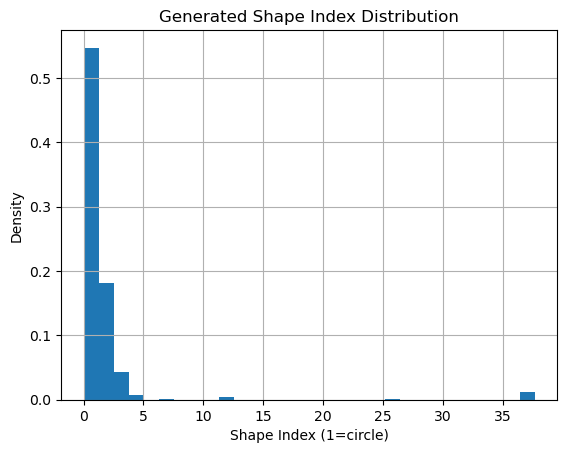

Mean Shape Index (Generated): 1.8806


In [ ]:
# RUN ALL METRICS 
plot_radial_2pcf(real_imgs_bin, gen_imgs_bin)
plot_grain_size_histogram(real_imgs_bin, gen_imgs_bin)
plot_orientation_distribution(real_imgs_bin, "Real")
plot_orientation_distribution(gen_imgs_bin, "Generated")
print(f"Avg Fractal Dimension (Real): {compute_avg_fractal_dimension(real_imgs_bin):.4f}")
print(f"Avg Fractal Dimension (Generated): {compute_avg_fractal_dimension(gen_imgs_bin):.4f}")
shape_index_distribution(real_imgs_bin, "Real")
shape_index_distribution(gen_imgs_bin, "Generated")
